In [1]:
import sys
sys.path.insert(1, '/home/nicolas/code/src/')
sys.path.insert(1, '/home/nicolas/code/model/')
import torch
from RBM import RBM
import functions
import matplotlib.pyplot as plt
import numpy as np
import math
device = torch.device("cuda")
from matplotlib import colors

# INTERACTIONS Bernoulli-Bernoulli RBM MNIST
 - Nh = 500
 - lr = 0.01
 - NGibbs = 1000

In [2]:
f_interactions_1 = "../model/AllParametersLongRUNExMC_MNIST_Nh500_lr0.01_l20.0_NGibbs10.h5"
myRBM_1, f_1, alltimes = functions.retrieveRBM(device, f_interactions_1)
alltimes_1 = np.array(alltimes)

f_interactions_2 = "../model/AllParameters_LongRUNExMC_nMB500_NS50000_TEMP_0_MNIST_Nh500_lr0.01_l20.0_NGibbs10000.h5"
myRBM_2, f_2, alltimes = functions.retrieveRBM(device, f_interactions_2)
alltimes_2 = np.array(alltimes)

In [3]:
singVal_1 = functions.singValTrain_1(f_interactions_1, alltimes_1, device = device)
singVal_2 = functions.singValTrain_1(f_interactions_2, alltimes_2, device = device)

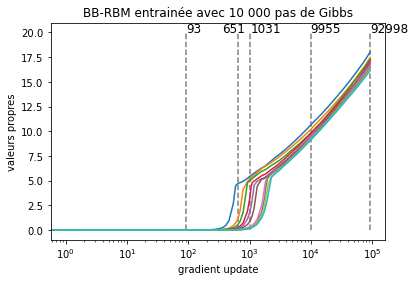

In [4]:
times_interactions = np.array([0,93,651,1031,9955,92998])

plt.plot(alltimes_2,singVal_2[:,:10]);

plt.xlabel("gradient update")
plt.ylabel("valeurs propres")
plt.title("BB-RBM entrainée avec 10 000 pas de Gibbs")
h2=20

for t in times_interactions:
    if t!=0:
        plt.vlines(t, 0, h2, colors = "grey", linestyles = "dashed")
        if t == 651:
            plt.text(t-300, h2, str(t), size = "large")
        else :
            plt.text(t+.5, h2, str(t), size = "large")

plt.semilogx()

plt.savefig("../../Stage/rapport/fig/singValBBRBMMNIST_2")

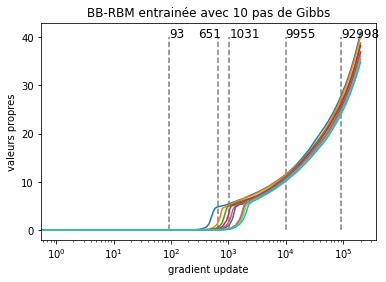

In [5]:
plt.plot(alltimes_1,singVal_1[:,:10]);
plt.xlabel("gradient update")
plt.ylabel("valeurs propres")
plt.title("BB-RBM entrainée avec 10 pas de Gibbs")
h1=40
for t in times_interactions:
    if t!=0:
        plt.vlines(t, 0, h1, colors = "grey", linestyles = "dashed")
        if t == 651:
            plt.text(t-350, h1, str(t), size = "large")
        else :
            plt.text(t+.5, h1, str(t), size = "large")
plt.semilogx()
plt.savefig("../../Stage/rapport/fig/singValBBRBMMNIST_1")

In [6]:
H = torch.load("../data/interactions/H_Ngibbs10.pt")
H_2 = torch.load("../data/interactions/H_Ngibbs10000.pt")

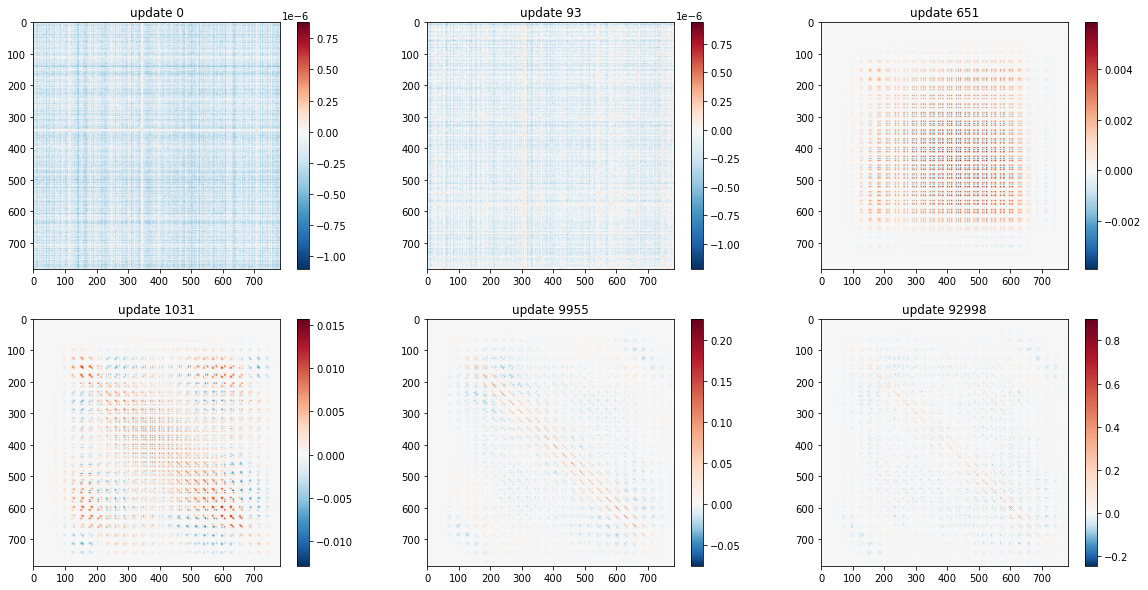

In [7]:
dnorm_l = []
for i in range(H.shape[0]):
    dnorm_l.append(colors.TwoSlopeNorm(vmin = torch.min(H[i,:,:]), vcenter=0., vmax = torch.max(H[i,:,:])))

divnorm=colors.TwoSlopeNorm( vcenter=0.)
dnormb = colors.TwoSlopeNorm(vcenter=0.)
fig, ax = plt.subplots(2,3, figsize = (20,10))
im1 = ax[0,0].imshow(H[0,:,:], cmap='RdBu_r', norm = dnorm_l[0])
ax[0,0].set_title("update "+str(times_interactions[0]))
fig.colorbar(im1, ax = ax[0,0])
im2 = ax[0,1].imshow(H[1,:,:], cmap='RdBu_r', norm = dnorm_l[1])
ax[0,1].set_title("update "+str(times_interactions[1]))
fig.colorbar(im2, ax = ax[0,1])
im3 = ax[0,2].imshow(H[2,:,:], cmap='RdBu_r', norm = dnorm_l[2])
ax[0,2].set_title("update "+str(times_interactions[2]))
fig.colorbar(im3, ax = ax[0,2])
im4 = ax[1,0].imshow(H[3,:,:], cmap='RdBu_r', norm = dnorm_l[3])
ax[1,0].set_title("update "+str(times_interactions[3]))
fig.colorbar(im4, ax = ax[1,0])
im5 = ax[1,1].imshow(H[4,:,:], cmap='RdBu_r', norm = dnorm_l[4])
ax[1,1].set_title("update "+str(times_interactions[4]))
fig.colorbar(im5, ax = ax[1,1])
im6 = ax[1,2].imshow(H[5,:,:], cmap='RdBu_r', norm = dnorm_l[5])
ax[1,2].set_title("update "+str(times_interactions[5]))
fig.colorbar(im6, ax = ax[1,2])
plt.savefig("../../Stage/rapport/fig/InteractionMatrixBBRBMMNIST")

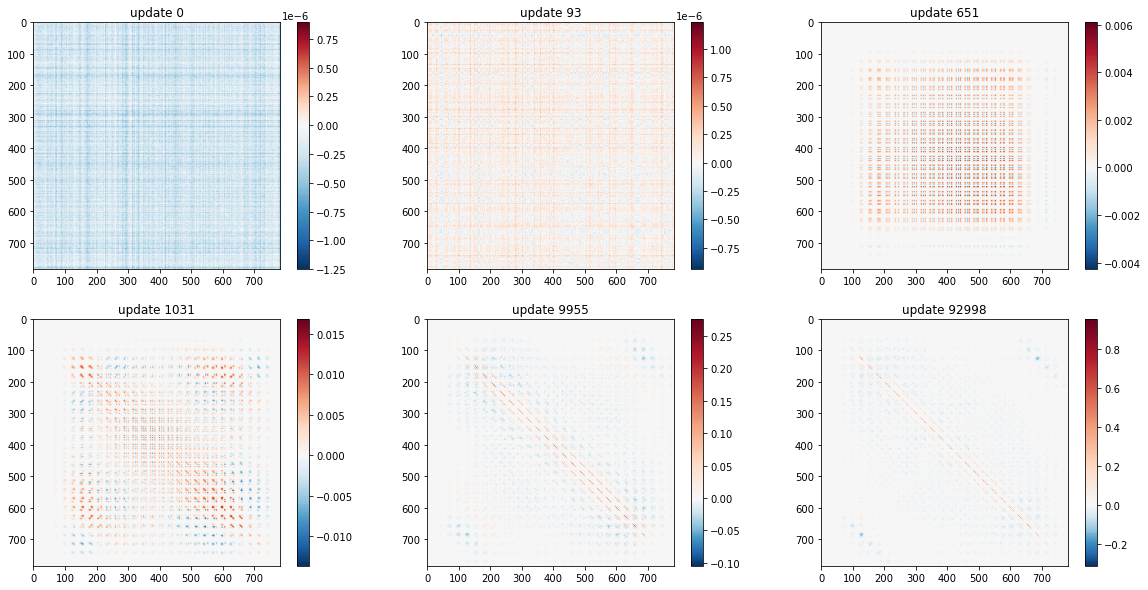

In [8]:
dnorm_l_2 = []
for i in range(H_2.shape[0]):
    dnorm_l_2.append(colors.TwoSlopeNorm(vmin = torch.min(H_2[i,:,:]), vcenter=0., vmax = torch.max(H_2[i,:,:])))
    
divnorm=colors.TwoSlopeNorm( vcenter=0.)
dnormb = colors.TwoSlopeNorm(vcenter=0.)
fig, ax = plt.subplots(2,3, figsize = (20,10))
im1 = ax[0,0].imshow(H_2[0,:,:], cmap='RdBu_r', norm = dnorm_l_2[0])
ax[0,0].set_title("update "+str(times_interactions[0]))
fig.colorbar(im1, ax = ax[0,0])
im2 = ax[0,1].imshow(H_2[1,:,:], cmap='RdBu_r', norm = dnorm_l_2[1])
ax[0,1].set_title("update "+str(times_interactions[1]))
fig.colorbar(im2, ax = ax[0,1])
im3 = ax[0,2].imshow(H_2[2,:,:], cmap='RdBu_r', norm = dnorm_l_2[2])
ax[0,2].set_title("update "+str(times_interactions[2]))
fig.colorbar(im3, ax = ax[0,2])
im4 = ax[1,0].imshow(H_2[3,:,:], cmap='RdBu_r', norm = dnorm_l_2[3])
ax[1,0].set_title("update "+str(times_interactions[3]))
fig.colorbar(im4, ax = ax[1,0])
im5 = ax[1,1].imshow(H_2[4,:,:], cmap='RdBu_r', norm = dnorm_l_2[4])
ax[1,1].set_title("update "+str(times_interactions[4]))
fig.colorbar(im5, ax = ax[1,1])
im6 = ax[1,2].imshow(H_2[5,:,:], cmap='RdBu_r', norm = dnorm_l_2[5])
ax[1,2].set_title("update "+str(times_interactions[5]))
fig.colorbar(im6, ax = ax[1,2])
plt.savefig("../../Stage/rapport/fig/InteractionMatrixBBRBMMNIST_2")

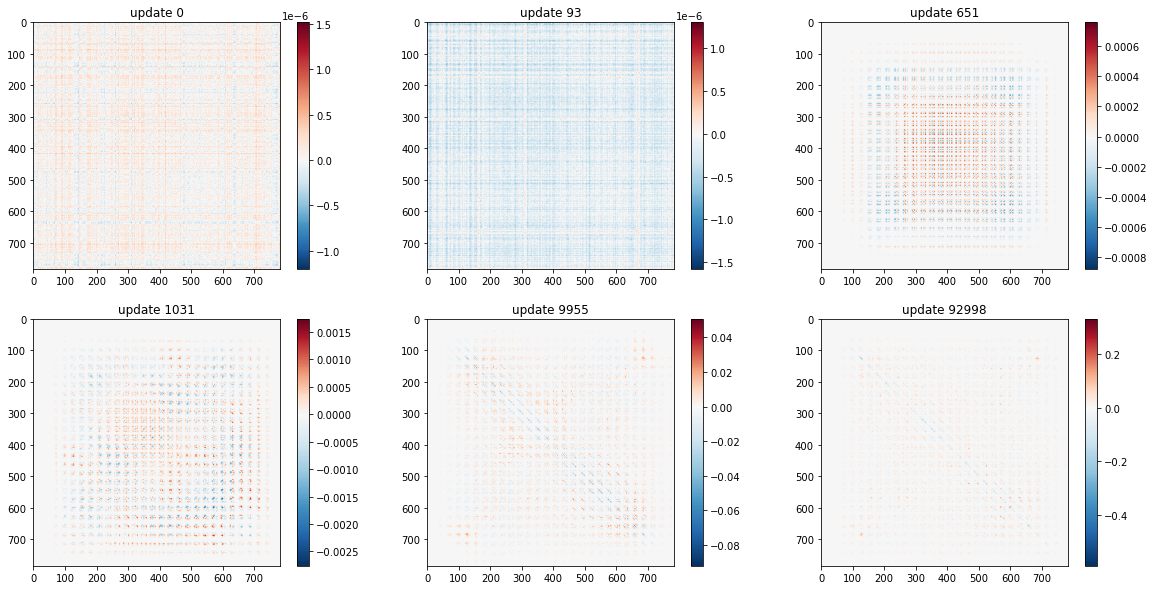

In [9]:
newH = H-H_2

dnorm_l_2 = []
for i in range(H_2.shape[0]):
    dnorm_l_2.append(colors.TwoSlopeNorm(vmin = torch.min(newH[i,:,:]), vcenter=0., vmax = torch.max(newH[i,:,:])))
    
divnorm=colors.TwoSlopeNorm( vcenter=0.)
dnormb = colors.TwoSlopeNorm(vcenter=0.)
fig, ax = plt.subplots(2,3, figsize = (20,10))
im1 = ax[0,0].imshow(newH[0,:,:], cmap='RdBu_r', norm = dnorm_l_2[0])
ax[0,0].set_title("update "+str(times_interactions[0]))
fig.colorbar(im1, ax = ax[0,0])
im2 = ax[0,1].imshow(newH[1,:,:], cmap='RdBu_r', norm = dnorm_l_2[1])
ax[0,1].set_title("update "+str(times_interactions[1]))
fig.colorbar(im2, ax = ax[0,1])
im3 = ax[0,2].imshow(newH[2,:,:], cmap='RdBu_r', norm = dnorm_l_2[2])
ax[0,2].set_title("update "+str(times_interactions[2]))
fig.colorbar(im3, ax = ax[0,2])
im4 = ax[1,0].imshow(newH[3,:,:], cmap='RdBu_r', norm = dnorm_l_2[3])
ax[1,0].set_title("update "+str(times_interactions[3]))
fig.colorbar(im4, ax = ax[1,0])
im5 = ax[1,1].imshow(newH[4,:,:], cmap='RdBu_r', norm = dnorm_l_2[4])
ax[1,1].set_title("update "+str(times_interactions[4]))
fig.colorbar(im5, ax = ax[1,1])
im6 = ax[1,2].imshow(newH[5,:,:], cmap='RdBu_r', norm = dnorm_l_2[5])
ax[1,2].set_title("update "+str(times_interactions[5]))
fig.colorbar(im6, ax = ax[1,2])
plt.savefig("../../Stage/rapport/fig/InteractionMatrixBBRBMMNIST_diff")

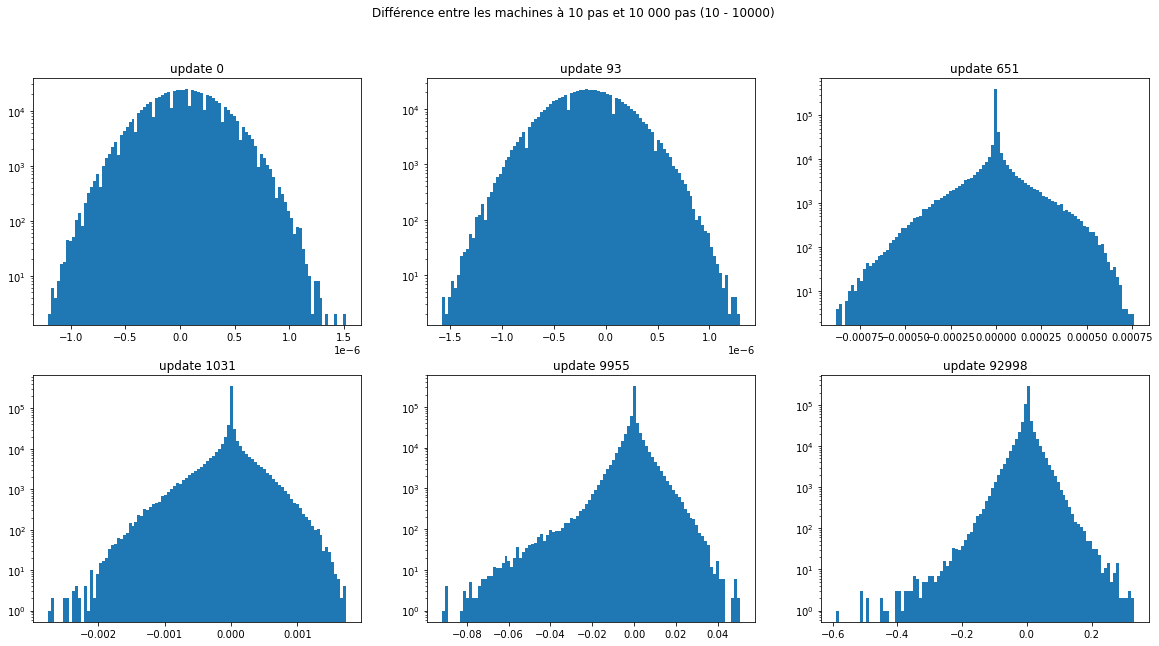

In [10]:
diff = H-H_2
nbins = 100
fig, ax = plt.subplots(2,3, figsize = (20,10))
im1 = ax[0,0].hist(diff[0,:,:].reshape(784*784).cpu().numpy(), bins = nbins)
ax[0,0].set_title("update "+str(times_interactions[0]))
im2 = ax[0,1].hist(diff[1,:,:].reshape(784*784).cpu().numpy(), bins = nbins)
ax[0,1].set_title("update "+str(times_interactions[1]))
im3 = ax[0,2].hist(diff[2,:,:].reshape(784*784).cpu().numpy(), bins = nbins)
ax[0,2].set_title("update "+str(times_interactions[2]))
im4 = ax[1,0].hist(diff[3,:,:].reshape(784*784).cpu().numpy(), bins = nbins)
ax[1,0].set_title("update "+str(times_interactions[3]))
im5 = ax[1,1].hist(diff[4,:,:].reshape(784*784).cpu().numpy(), bins = nbins)
ax[1,1].set_title("update "+str(times_interactions[4]))
im6 = ax[1,2].hist(diff[5,:,:].reshape(784*784).cpu().numpy(), bins = nbins)
ax[1,2].set_title("update "+str(times_interactions[5]))
ax[0,0].semilogy()
ax[0,1].semilogy()
ax[0,2].semilogy()
ax[1,0].semilogy()
ax[1,1].semilogy()
ax[1,2].semilogy()

fig.suptitle("Différence entre les machines à 10 pas et 10 000 pas (10 - 10000)");
plt.savefig("../../Stage/rapport/fig/InteractionMatrixBBRBMMNIST_diff_hist")

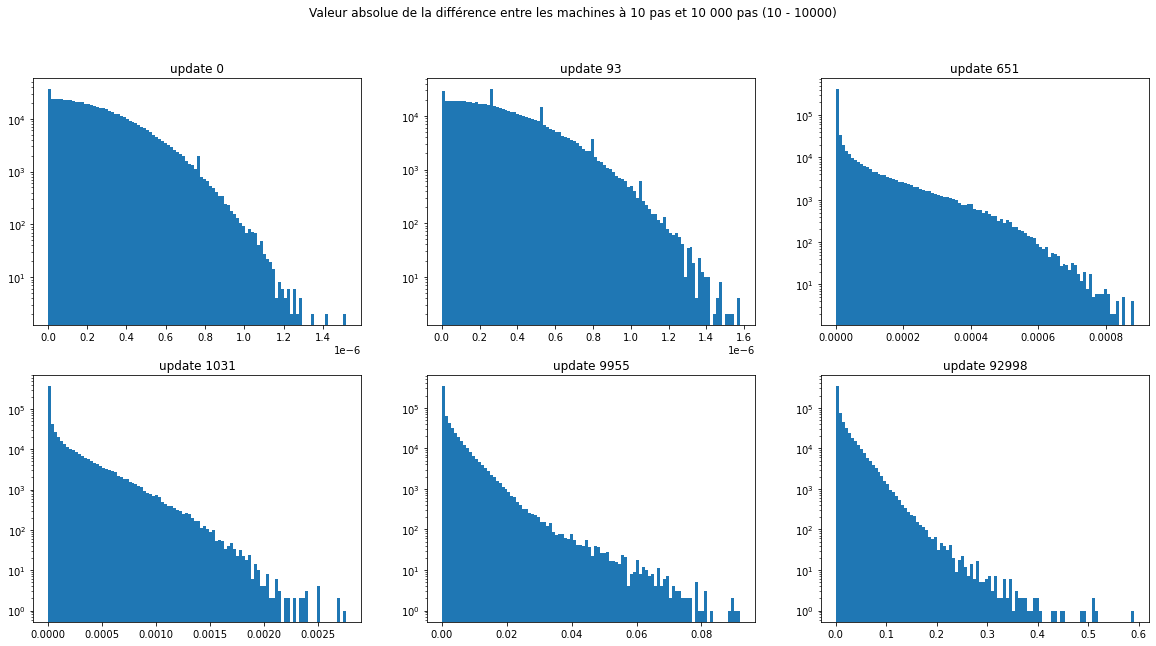

In [11]:
diff = torch.abs(H-H_2)
nbins = 100
fig, ax = plt.subplots(2,3, figsize = (20,10))
im1 = ax[0,0].hist(diff[0,:,:].reshape(784*784).cpu().numpy(), bins = nbins)
ax[0,0].set_title("update "+str(times_interactions[0]))
im2 = ax[0,1].hist(diff[1,:,:].reshape(784*784).cpu().numpy(), bins = nbins)
ax[0,1].set_title("update "+str(times_interactions[1]))
im3 = ax[0,2].hist(diff[2,:,:].reshape(784*784).cpu().numpy(), bins = nbins)
ax[0,2].set_title("update "+str(times_interactions[2]))
im4 = ax[1,0].hist(diff[3,:,:].reshape(784*784).cpu().numpy(), bins = nbins)
ax[1,0].set_title("update "+str(times_interactions[3]))
im5 = ax[1,1].hist(diff[4,:,:].reshape(784*784).cpu().numpy(), bins = nbins)
ax[1,1].set_title("update "+str(times_interactions[4]))
im6 = ax[1,2].hist(diff[5,:,:].reshape(784*784).cpu().numpy(), bins = nbins)
ax[1,2].set_title("update "+str(times_interactions[5]))
ax[0,0].semilogy()
ax[0,1].semilogy()
ax[0,2].semilogy()
ax[1,0].semilogy()
ax[1,1].semilogy()
ax[1,2].semilogy()

fig.suptitle("Valeur absolue de la différence entre les machines à 10 pas et 10 000 pas (10 - 10000)");

In [12]:
f_tmp = "../model/AllParametersLongRUNExMC_MNIST_Nh500_lr0.01_l20.0_NGibbs100.h5"
myRBM, f, alltimes = functions.retrieveRBM(device, f_tmp)
alltimes = np.array(alltimes)

In [13]:
alltime = np.array(f['alltime'])
alltimes = []
for t in f['alltime'][:]:
    if t<=10240:
        if 'paramW'+str(t) in f:
            alltimes.append(t)
alltimes_est = np.array(alltimes)

In [14]:
singVal = functions.singValTrain_1(f_tmp, alltimes_est, device = device)


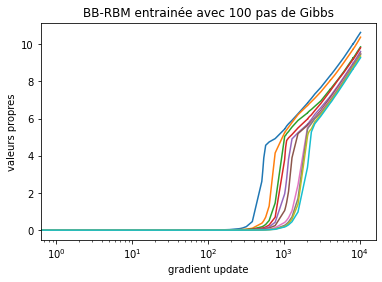

In [15]:
plt.plot(alltimes,singVal[:,:10]);

plt.xlabel("gradient update")
plt.ylabel("valeurs propres")
plt.title("BB-RBM entrainée avec 100 pas de Gibbs")

plt.semilogx()

plt.savefig("../../Stage/rapport/fig/singValBBRBMMNIST_compar")

In [16]:
alltimes_est

array([    0,     1,     2,     3,     4,     5,     6,     8,     9,
          10,    12,    16,    17,    18,    20,    24,    32,    33,
          34,    36,    40,    48,    64,    65,    66,    68,    72,
          80,    96,   128,   129,   130,   132,   136,   144,   160,
         192,   256,   257,   258,   260,   264,   272,   288,   320,
         384,   512,   513,   514,   516,   520,   528,   544,   576,
         640,   768,  1024,  1025,  1026,  1028,  1032,  1040,  1056,
        1088,  1152,  1280,  1536,  2048,  2049,  2050,  2052,  2056,
        2064,  2080,  2112,  2176,  2304,  2560,  3072,  4096,  4097,
        4098,  4100,  4104,  4112,  4128,  4160,  4224,  4352,  4608,
        5120,  6144,  8192,  8193,  8194,  8196,  8200,  8208,  8224,
        8256,  8320,  8448,  8704,  9216, 10240])